**DATA EXPLORATION**
In this kernel, I will explore the dataset by looking in the independent and dependent variables, as well as their relationship.

The steps I will perform:
1. Checking for missing values
2. Check the distribution of dependent variable
3. Check the relationship between dependent and top most-correlated independent variables
4. Check the outlier of top most-correlated independent variables
5. Check the assumptions of _linear regression_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load data

In [3]:
train = pd.read_csv('../input/train.csv')

In [4]:
train.shape

(1314, 81)

In [5]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

# Missing values???? 

In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1308,0.995434
MiscFeature,1269,0.965753
Alley,1226,0.933029
Fence,1057,0.804414
FireplaceQu,620,0.471842
LotFrontage,229,0.174277
GarageCond,75,0.057078
GarageType,75,0.057078
GarageYrBlt,75,0.057078
GarageFinish,75,0.057078


# SalePrice

In [7]:
train['SalePrice'].describe()

count      1314.000000
mean     179913.774734
std       79040.984606
min       34900.000000
25%      129900.000000
50%      162250.000000
75%      213187.500000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
mean = train['SalePrice'].mean()
std = train['SalePrice'].std()

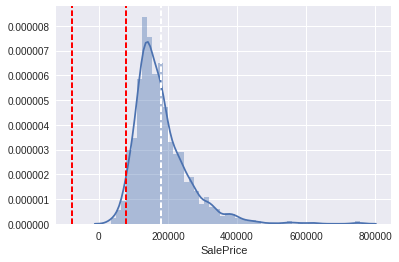

In [9]:
sns.distplot(train['SalePrice'])
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [10]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.941907
Kurtosis: 7.171265


# Relationship between SalePrice and other variables

In [11]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                       'Heating', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'ExterQual', 'ExterCond', 
                       'HeatingQC', 'KitchenQual']

In [12]:
non_categorical = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

all_features = train.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

categorical = [value for value in all_features if value not in non_categorical and value != "Id" and value !='SalePrice']

In [13]:
print('Number of numeric features\t: {0}'.format(len(non_categorical)))
print('Number of categorical features\t: {0}'.format(len(categorical)))

Number of numeric features	: 35
Number of categorical features	: 44


In [14]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.785216
GrLivArea        0.704802
GarageCars       0.637424
GarageArea       0.613099
TotalBsmtSF      0.605847
1stFlrSF         0.598770
FullBath         0.571012
TotRmsAbvGrd     0.534604
YearBuilt        0.527131
YearRemodAdd     0.500197
GarageYrBlt      0.478958
MasVnrArea       0.471944
Fireplaces       0.459814
BsmtFinSF1       0.382938
LotFrontage      0.353185
WoodDeckSF       0.330485
2ndFlrSF         0.321050
OpenPorchSF      0.309975
HalfBath         0.276541
LotArea          0.275603
BsmtFullBath     0.231909
BsmtUnfSF        0.215749
BedroomAbvGr     0.187123
PoolArea         0.107824
ScreenPorch      0.091976
3SsnPorch        0.047564
MoSold           0.032428
BsmtFinSF2       0.000689
Id              -0.013328
MiscVal         -0.019388
BsmtHalfBath    -0.020166
YrSold          -0.021426
LowQualFinSF    -0.060154
OverallCond     -0.076157
MSSubClass      -0.099072
KitchenAbvGr    

## Numeric features

In [15]:
compared_data = pd.concat([train['SalePrice'], train[non_categorical]], axis=1)
compared_data.head()

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,73000,30.0,5232,5,5,1925,2004,0.0,0,0,...,504,0,0,0,0,0,0,0,6,2008
1,339750,85.0,10800,8,5,2007,2008,100.0,789,0,...,836,0,102,0,0,0,0,0,4,2008
2,281213,88.0,12665,8,5,2005,2006,245.0,0,0,...,642,144,39,0,0,0,0,0,2,2007
3,88000,51.0,6120,5,7,1925,1950,0.0,489,0,...,450,0,0,112,0,120,0,620,7,2006
4,180500,60.0,13515,6,6,1919,1950,0.0,0,0,...,520,0,0,126,0,0,0,0,7,2007


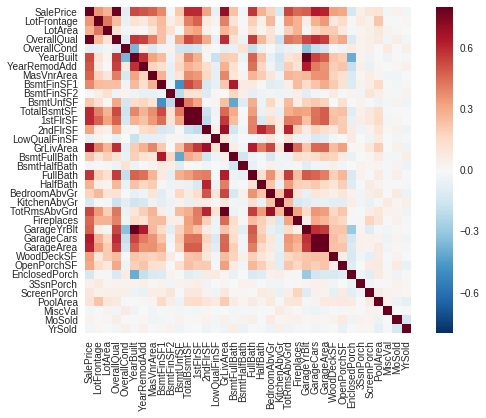

In [16]:
#correlation matrix
corrmat = compared_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
plt.close()

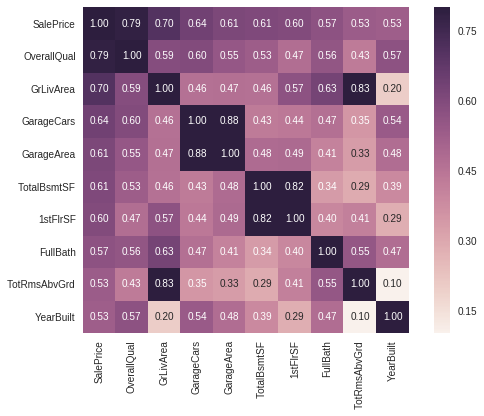

In [17]:
k = 10 #number of variables for heatmap
sub_df = corrmat.nlargest(k, 'SalePrice')['SalePrice']
cols = sub_df.index
high_corr_features = train[cols]
selected_corrmat = high_corr_features.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(selected_corrmat, vmax=.8, square=True, annot=True,fmt='.2f', annot_kws={'size': 10})
plt.show()
plt.close()

Top most important variables:
- GrLivArea
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- MasVnrArea
- OverallQual
- GarageCars
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd
- GarageYrBlt

### GrLivArea

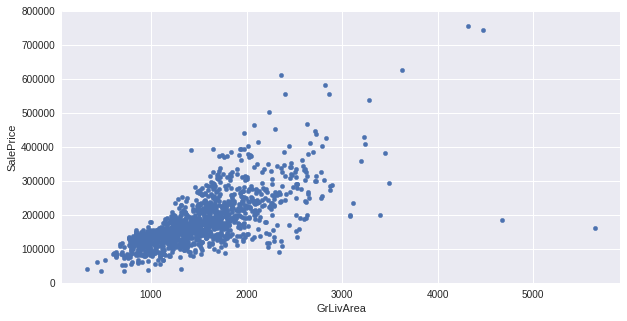

In [18]:
var_1 = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var_1]], axis=1)
data.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

### GarageArea

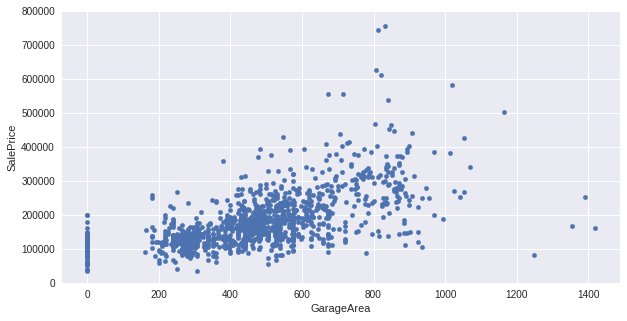

In [19]:
var_1 = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var_1]], axis=1)
data.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

### TotalBsmtSF

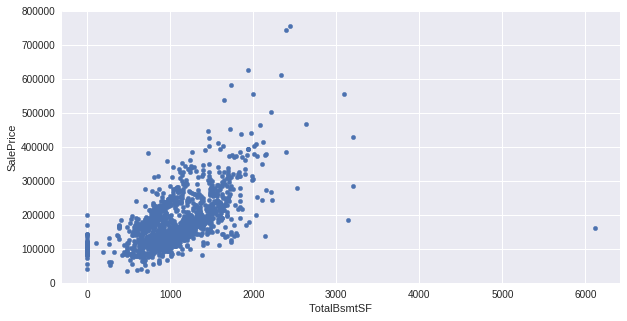

In [20]:
var_1 = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var_1]], axis=1)
data.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

### 1stFlrSF

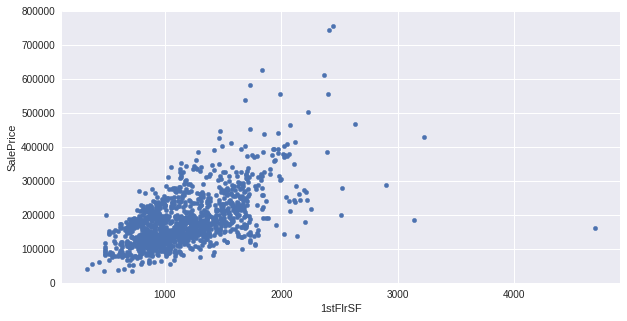

In [21]:
var_1 = '1stFlrSF'
data = pd.concat([train['SalePrice'], train[var_1]], axis=1)
data.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

### MasVnrArea

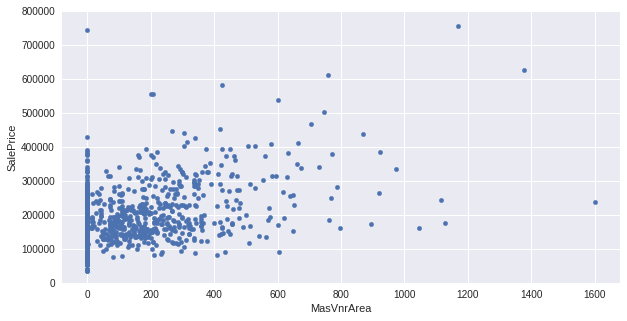

In [22]:
var_1 = 'MasVnrArea'
data = pd.concat([train['SalePrice'], train[var_1]], axis=1)
data.plot.scatter(x=var_1, y='SalePrice', ylim=(0,800000), figsize=[10, 5]);

Top 7 most important variables:


### OverallQual

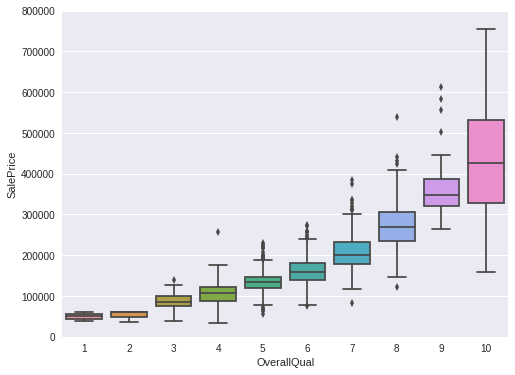

In [23]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

### GarageCars

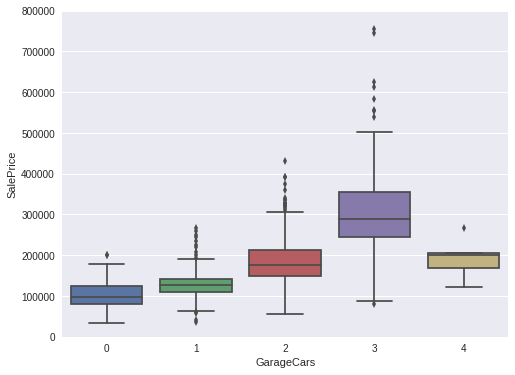

In [24]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

### FullBath

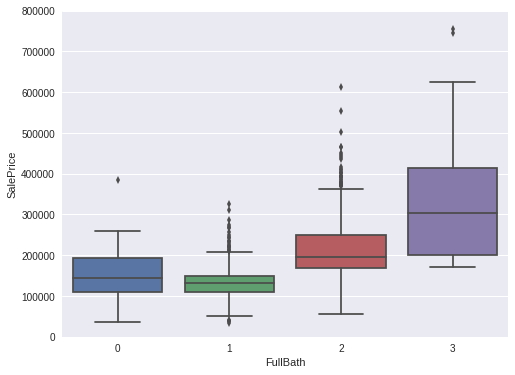

In [25]:
var = 'FullBath'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

### TotRmsAbvGrd

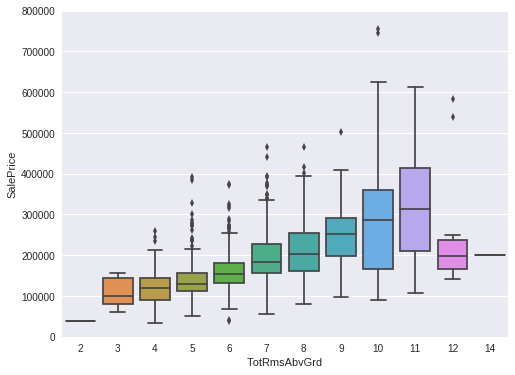

In [26]:
var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

### YearBuilt

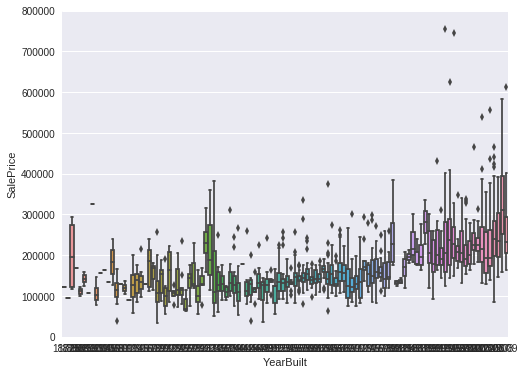

In [27]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

### YearRemodAdd

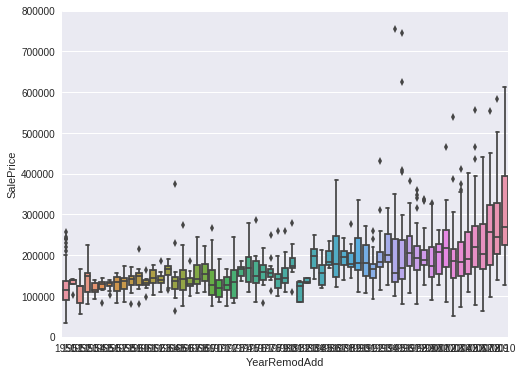

In [28]:
var = 'YearRemodAdd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

### GarageYrBlt

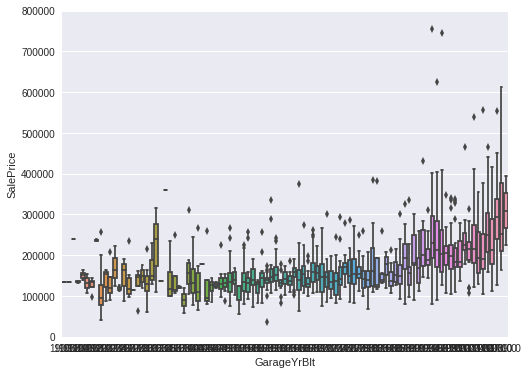

In [29]:
var = 'GarageYrBlt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

# Check assumption

## Multivariate normality

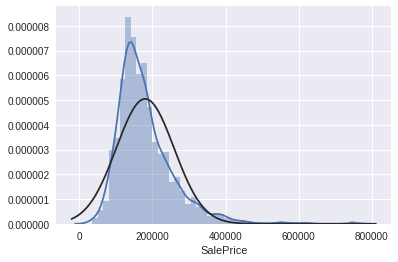

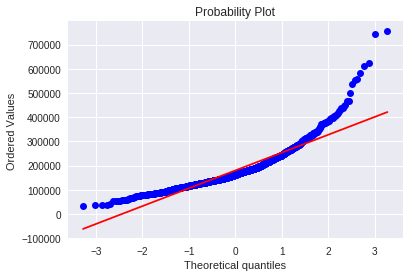

In [30]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

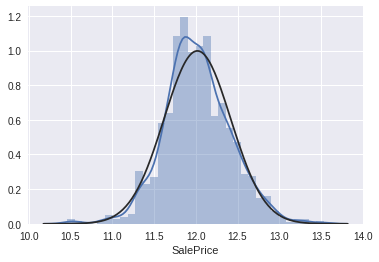

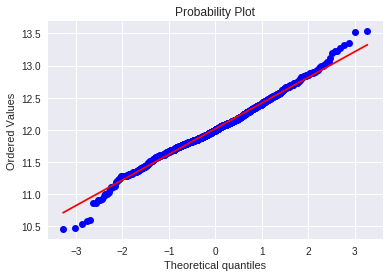

In [31]:
train['SalePrice'] = np.log(train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

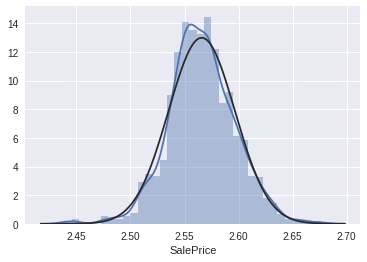

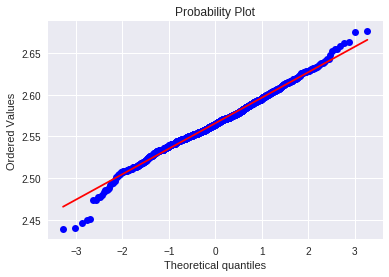

In [32]:
train['SalePrice'] = np.log1p(train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

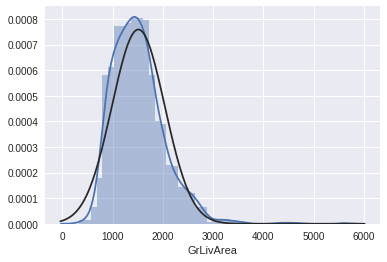

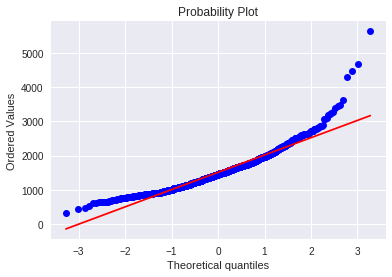

In [33]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

## Homoscedasticity

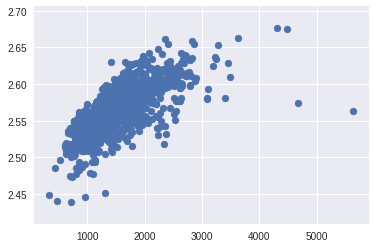

In [34]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice']);